Импортировать библиотеку pandas.

Загрузите два датасета user_data и logs.

Проверить размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

Какой клиент совершил больше всего успешных операций? (success == True).

С какой платформы осуществляется наибольшее количество успешных операций?

Какую платформу предпочитают премиумные клиенты?

Визуализировать распределение возраста клиентов в зависимости от типа клиента (премиум или нет).

Построить график распределения числа успешных операций.

Визуализировать число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

**user_data:**

client – идентификатор пользователя

premium – является ли клиент премиум

age – возраст

**logs:**

client – идентификатор пользователя

success – результат (успех - 1, нет - 0)

platform – платформа

time – время в формате Unix

**Импортировать библиотеку pandas как pd.**

**Загрузить два датасета user_data и logs.**

In [ ]:
import pandas as pd

In [ ]:
user_data = pd.read_csv('/content/user_data.csv')
logs = pd.read_csv('/content/logs.csv')

**Проверить размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.**

In [ ]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [ ]:
logs.shape

(4500, 4)

In [ ]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [ ]:
logs.nunique()

client      4011
success        2
platform       3
time        4376
dtype: int64

In [ ]:
logs.isna()

,client,success,platform,time
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
4495,False,False,False,False
4496,False,False,False,False
4497,False,False,False,False
4498,False,False,False,False


In [ ]:
#True и False 1 и 0, соответственно можем просуммировать и посмотреть где есть пропущенные значения
#Если значение пропущено, то получаем True тоесть 1, после чего суммируем эти случаи и получаем число пропущенных значений в клонке
#Если значение не пропущено, то получаем False тоесть 0, после чего суммируем и получаем просто 0
#В итоге, если везде нули значит нет пропущенных значений
logs.isna().sum()


client      0
success     0
platform    0
time        0
dtype: int64

In [ ]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


**Какой клиент совершил больше всего успешных операций? (success == True)**

In [ ]:
success_number_peremennaya = logs.query('success == True') \
                        .groupby('client', as_index = False) \
                        .agg({'platform' : 'count'}) \
                        .rename(columns = {'platform' : 'success_number'}) \
                        .sort_values('success_number', ascending=False)
success_number_peremennaya

,client,success_number
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


In [ ]:
maximum_success = success_number_peremennaya.success_number.max()
maximum_success

41

In [ ]:
success_number_peremennaya.query('success_number == @maximum_success')

,client,success_number
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41


In [ ]:
success_number_peremennaya.query('success_number == @maximum_success')

,client,success_number
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41


In [ ]:
spisok_clientov = success_number_peremennaya \
                  .query('success_number == @maximum_success') \
                  .sort_values('client') \
                  .client.to_list()
spisok_clientov

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [ ]:
for i in spisok_clientov:
  print(i, end=', ')

12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584, 

In [ ]:
'- '.join(['a', 'b', 'c'])

'a- b- c'

In [ ]:
[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [ ]:
[str(i) for i in spisok_clientov]

['12179',
 '28719',
 '36165',
 '52870',
 '61468',
 '61473',
 '78349',
 '82563',
 '92584']

In [ ]:
', '.join([str(i) for i in spisok_clientov])

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

In [ ]:
success_number_peremennaya2 = logs \
                        .groupby('client', as_index = False) \
                        .agg({'success' : 'sum'}) \
                        .rename(columns = {'success' : 'success_number'}) \
                        .sort_values('success_number', ascending=False)
success_number_peremennaya2

,client,success_number
3300,82563,41
1426,36165,41
2095,52870,41
468,12179,41
2469,61473,41
...,...,...
2157,54315,0
689,17713,0
3042,76192,0
3041,76172,0


In [ ]:
success_number_peremennaya2.query('success_number == @maximum_success')

,client,success_number
3300,82563,41
1426,36165,41
2095,52870,41
468,12179,41
2469,61473,41
3141,78349,41
1120,28719,41
2468,61468,41
3712,92584,41


In [ ]:
maximum_success2 = success_number_peremennaya2.success_number.max()
maximum_success2

41

In [ ]:
spisok_clientov2 = success_number_peremennaya2 \
                  .query('success_number == @maximum_success') \
                  .sort_values('client') \
                  .client.to_list()
spisok_clientov2

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [ ]:
', '.join([str(i) for i in spisok_clientov2])

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

**С какой платформы осуществляется наибольшее количество успешных операций?**

In [ ]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [ ]:
logs.query('success == True').groupby('platform').agg({'platform' : 'count'}).rename(columns = {'platform' : 'counts'})

,counts
platform,
computer,1090
phone,2019
tablet,180


In [ ]:
#Второй вариант
logs.query('success == True').value_counts('platform').idxmax()

'phone'

**Какую платформу предпочитают премиумные клиенты?**

In [ ]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [ ]:
merge_table = user_data.merge(logs, on ='client', how ='inner')
merge_table

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [ ]:
merge_table.query('premium == True').groupby('platform').agg({'platform' : 'count'}).rename(columns = {'platform' : 'counts'})

,counts
platform,
computer,150
phone,246
tablet,24


**Визуализировать распределение возраста клиентов в зависимости от типа клиента (премиум или нет)**

In [ ]:
import seaborn as sns
%matplotlib inline

<Axes: xlabel='age', ylabel='Density'>

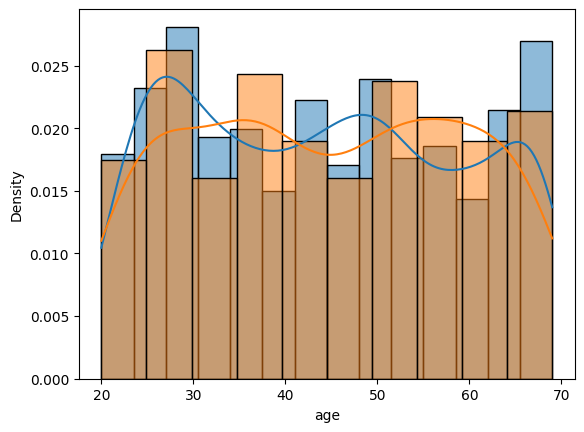

In [ ]:
sns.histplot(merge_table.query('premium == False').age, kde=True, stat="density")
sns.histplot(merge_table.query('premium == True').age, kde=True, stat="density")

In [ ]:
import matplotlib.pyplot as plt

<Axes: xlabel='age', ylabel='Density'>

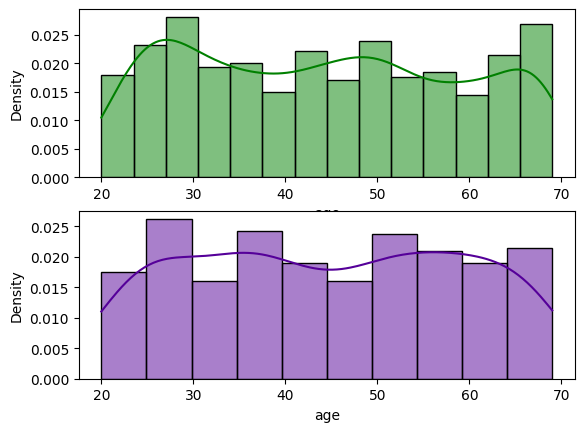

In [ ]:
#Построим на одном рисунке несколько графиков
#Надо сделать сетку, на которой укажем сколько будет графиков на картинке
#Для этого используем метод plt.subplots, в котором указываем число строк и колонок
fig, axxx  =  plt.subplots(nrows = 2, ncols = 1)

sns.histplot(merge_table.query('premium == False').age, kde=True, stat="density", ax=axxx[0], color = 'green')
sns.histplot(merge_table.query('premium == True').age, kde=True, stat="density", ax=axxx[1], color = '#5092')


**Построить график распределения числа успешных операций**

In [ ]:
df_client = merge_table.groupby('client').agg({'success': 'sum'})
df_client

,success
client,
40,1
75,1
81,1
132,1
164,1
...,...
99926,1
99927,1
99931,1


In [ ]:
df_client.success.value_counts()

1     2051
0      850
2       42
41       9
40       1
3        1
Name: success, dtype: int64

<Axes: ylabel='Count'>

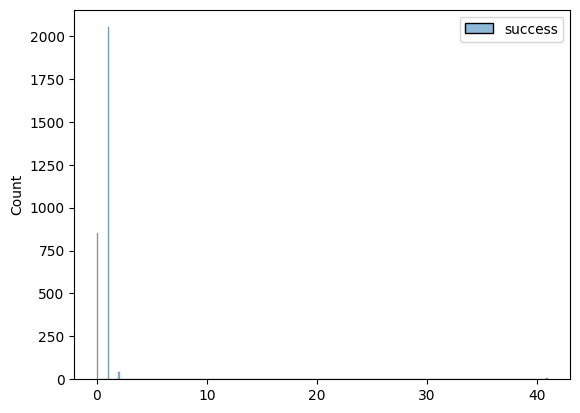

In [ ]:
sns.histplot(df_client)


**Визуализировать число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?**

In [ ]:
merge_table.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [ ]:
#VAR1
computer_success1 = merge_table.query('platform == "computer"') \
                               .groupby('age', as_index = False) \
                               .agg({'success':'sum'})
computer_success1

<Axes: xlabel='age', ylabel='success'>

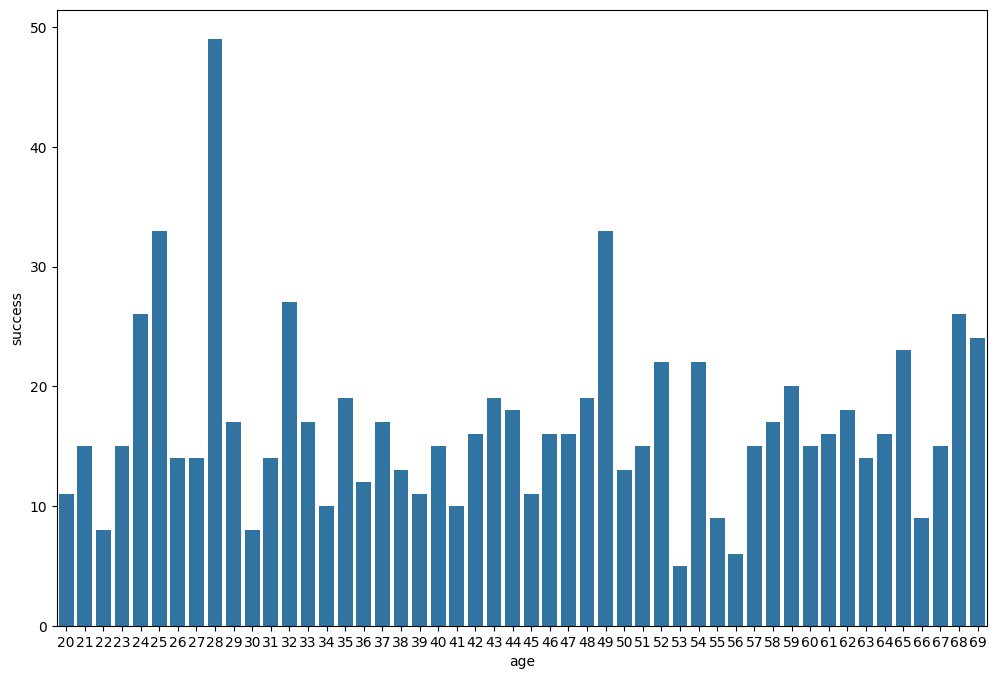

In [ ]:
plt.figure(figsize =(12, 8))
sns.barplot(x = computer_success1.age, y = computer_success1.success)

<Axes: xlabel='age', ylabel='success'>

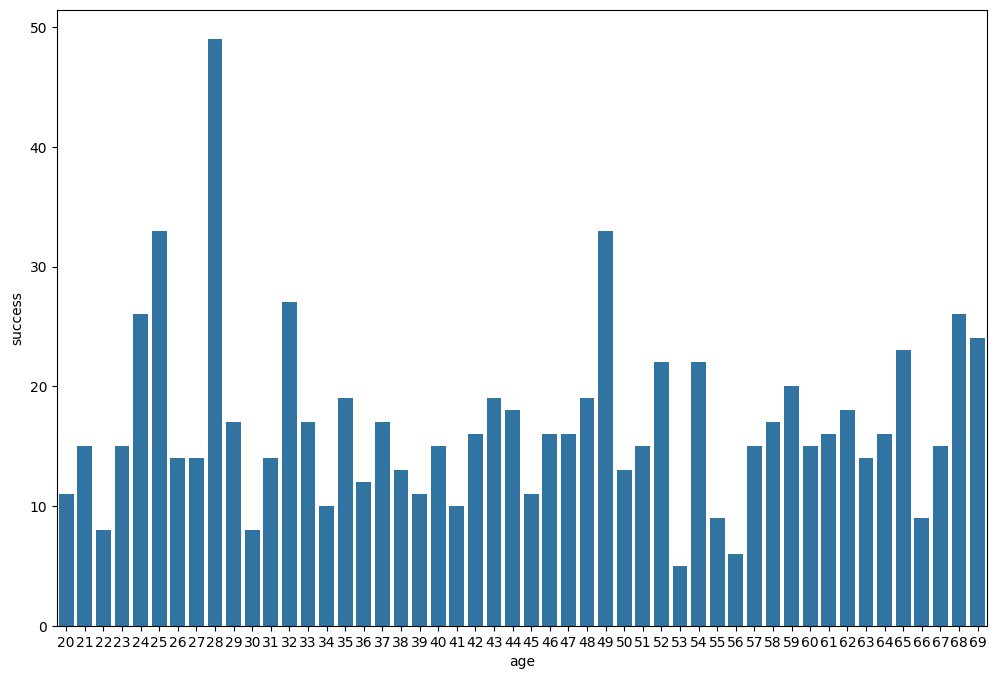

In [ ]:
#Можно записать так
plt.figure(figsize =(12, 8))
sns.barplot(x = 'age', y = 'success', data = computer_success1)

In [ ]:
#VAR2
computer_success2 = merge_table.query('platform == "computer" and success == True')
computer_success2

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108
...,...,...,...,...,...,...
3414,93718,False,63,True,computer,1585466349
3415,13688,True,66,True,computer,1585453923
3417,68348,False,69,True,computer,1585456739
3427,9450,False,34,True,computer,1585446079


<Axes: xlabel='age', ylabel='count'>

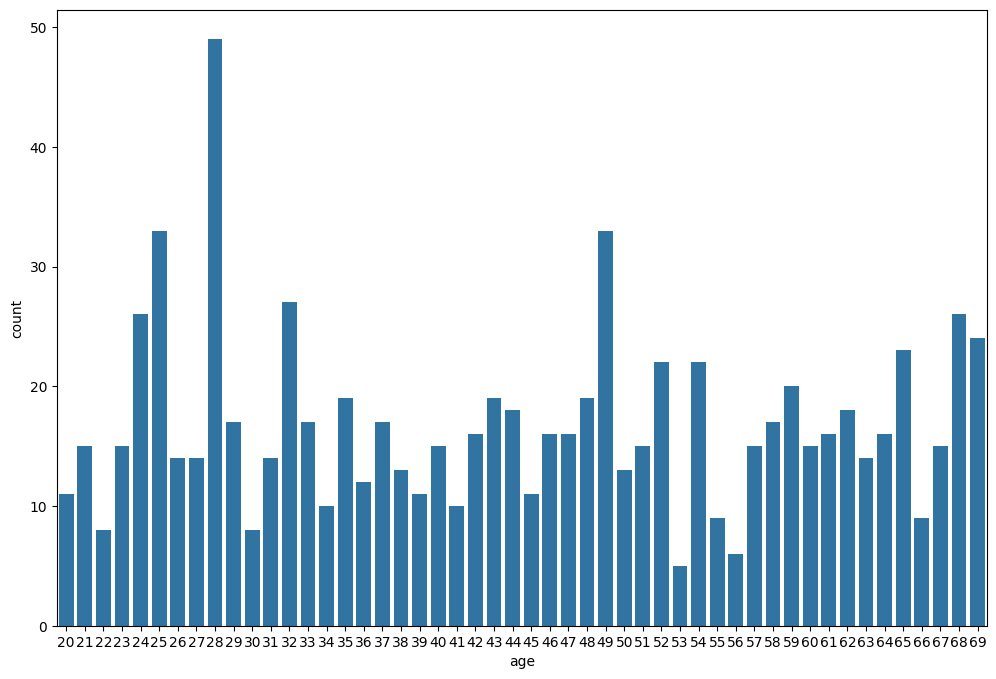

In [ ]:
plt.figure(figsize =(12, 8))
sns.countplot(computer_success2, x = 'age')

# **Заметки**

**Первичный анализ**

`.head()` - таблица

`.shape` - размер таблицы

`.dtypes` - тип данных

`.nunique()` - число уникальных значений

`.isna()` - пропущенные значения, выводит Истинну или Ложь (`isnull()` - аналог `isna()`)

`.describe()` - описательная статистика

Чтобы сослаться на переменную которой нет в дата фрейме, надо перед ней указать @

`success_number_peremennaya.query('success_number == @maximum_success')`

`'- '.join(['a', 'b', 'c'])` - метод строки, получим (a- b- c)

При визуализации, если поместить функции в одну ячейку, то графике отобразятся на одном канвасе(рисунке)